In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from keras.losses import MeanSquaredLogarithmicError
from keras.models import load_model

Mounted at /content/drive


# 100m only 10x10



In [ ]:
df_100m = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_100m_fast_trial_10.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_100m

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Descriptors 0,...,Descriptors 503,Descriptors 504,Descriptors 505,Descriptors 506,Descriptors 507,Descriptors 508,Descriptors 509,Descriptors 510,Descriptors 511,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1062,2,0.0,0.0,0.0,0.0,3.0,3.0,3.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1063,2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1064,2,0.0,0.0,6.0,3.0,4.0,4.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_100m[df_100m['Feature Extraction 0'].isna()]
nan_rows_d = df_100m[df_100m['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_100m = df_100m.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_100m = df_100m.dropna(subset=['Descriptors 0'])

Found 533 rows with NaN values in the Feature Extraction column.
Found 533 rows with NaN values in the Descriptors column.


In [ ]:
X_100m_10 = df_100m.drop('Carbon Values', axis=1)
y_100m_10 = df_100m['Carbon Values']

In [ ]:
X_train_100_10, X_test_100_10, y_train_100_10, y_test_100_10 = train_test_split(X_100m_10, y_100m_10, test_size=0.2, random_state=42)

In [ ]:
X_train_100_10 = X_train_100_10.values.reshape((X_train_100_10.shape[0], X_train_100_10.shape[1], 1))
X_test_100_10 = X_test_100_10.values.reshape((X_test_100_10.shape[0], X_test_100_10.shape[1], 1))

y_train_100_10 = y_train_100_10.values
y_test_100_10 = y_test_100_10.values



In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Flatten the input sequences
X_train_flattened_100_10 = np.array([x.flatten() for x in X_train_100_10])
X_test_flattened_100_10 = np.array([x.flatten() for x in X_test_100_10])

# Normalize the flattened sequences
scaler = MaxAbsScaler()

X_train_normalized_100_10 = scaler.fit_transform(X_train_flattened_100_10)
X_test_normalized_100_10 = scaler.transform(X_test_flattened_100_10)

# Reshape to match the input shape expected by the model
X_train_padded_100_10 = np.expand_dims(X_train_normalized_100_10, axis=-1)
X_test_padded_100_10 = np.expand_dims(X_test_normalized_100_10, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None, 1))

x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1,activation='relu')(x)

model_100_10 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_100_10.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_100_10 = model_100_10.fit(X_train_padded_100_10, y_train_100_10,
                            epochs= 300,
                            batch_size=64,
                            verbose = 1,
                            callbacks=[reduce_lr,early_stop],
                               validation_data=(X_test_padded_100_10, y_test_100_10))

Epoch 1/300
7/7 [==============================] - 6s 138ms/step - loss: 57.0171 - val_loss: 94.3491 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 0s 56ms/step - loss: 37.9810 - val_loss: 95.1402 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 0s 53ms/step - loss: 34.4164 - val_loss: 95.2719 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 0s 56ms/step - loss: 35.2115 - val_loss: 94.3304 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 0s 47ms/step - loss: 35.7723 - val_loss: 94.6477 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 0s 33ms/step - loss: 33.6493 - val_loss: 94.0002 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 0s 30ms/step - loss: 31.3409 - val_loss: 94.6236 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 0s 30ms/step - loss: 33.8223 - val_loss: 93.1777 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 0s 34ms/step - loss: 31.0454 - val_loss: 94.

In [ ]:
y_pred_100_10 = model_100_10.predict(X_test_padded_100_10)
mape = mean_absolute_percentage_error(y_test_100_10, y_pred_100_10)
print(f'MAPE: {mape}')

4/4 [==============================] - 0s 35ms/step
MAPE: 0.17395965063291588


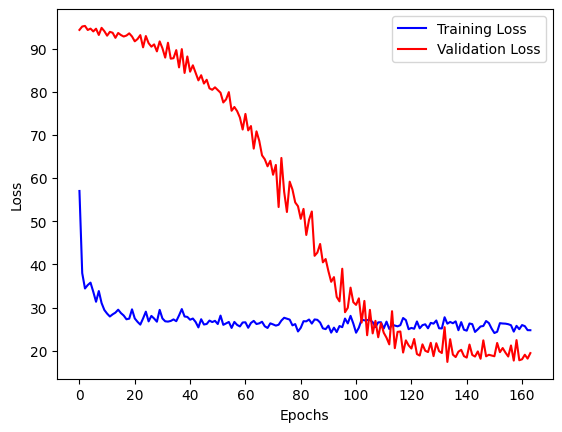

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_100_10.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_100_10.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_100_10, y_pred_100_10)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_10, y_pred_100_10)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_10, y_pred_100_10, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: 0.2690137339440699
Mean Absolute Error (MAE): 4.774314662897698
Root Mean Squared Error (RMSE): 8.030960024840915


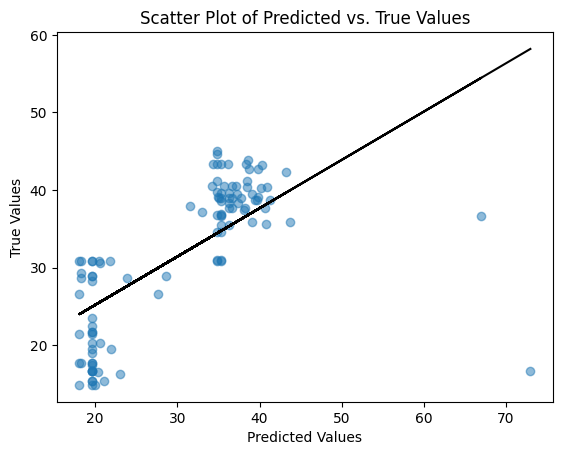

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_100_10, y_test_100_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_100_10.flatten(), y_test_100_10.flatten(), 1)
plt.plot(y_pred_100_10.flatten(), m*y_pred_100_10.flatten() + b, color='black')

plt.show()



In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_100_10)
X_test_scaled = scaler.transform(X_test_100_10)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=1)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_100_10)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_100_10)
print("Model score:", score)


[LibSVM]Model score: 0.5810551174649612


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_100_10, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_10, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_10, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_100_10, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.5810551174649612
Mean Absolute Error (MAE): 4.769439430453773
Root Mean Squared Error (RMSE): 6.079828101183066
Mean Absolute Percentage Error (MAPE): 0.20805679995045723


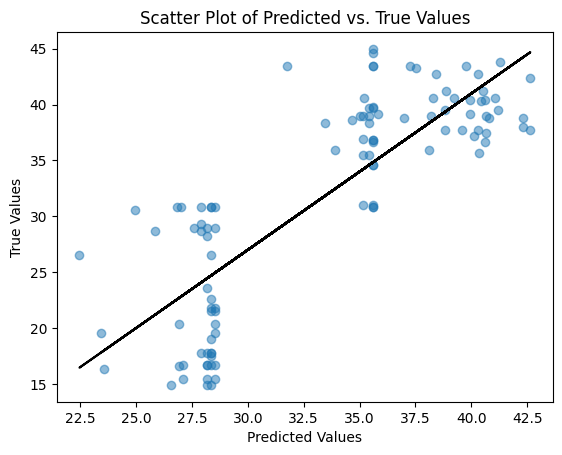

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_100_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_100_10, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_100_10)
X_test_scaled = scaler.transform(X_test_100_10)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_100_10)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_100_10, y_pred)
print("Model score:", score)


Model score: 0.7555577580627881


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_100_10, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_10, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_10, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_100_10, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7555577580627881
Mean Absolute Error (MAE): 3.8306141963047513
Root Mean Squared Error (RMSE): 4.644093817939422
Mean Absolute Percentage Error (MAPE): 0.15357061392200955


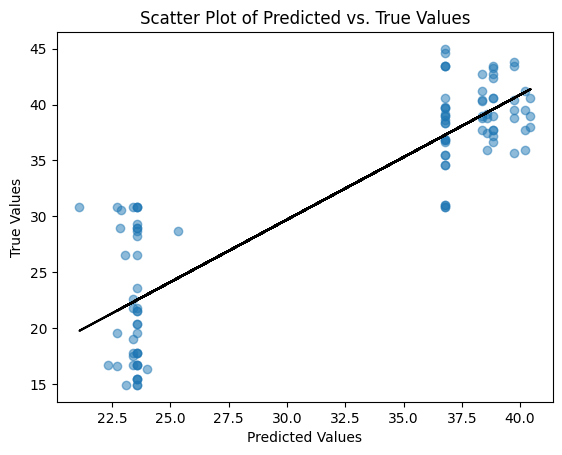

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_100_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_100_10, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 100m only 20x20



In [ ]:
df_100m_20 = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_100m_fast_trial_20.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_100m_20

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 3319,Descriptors 3320,Descriptors 3321,Descriptors 3322,Descriptors 3323,Descriptors 3324,Descriptors 3325,Descriptors 3326,Descriptors 3327,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1076,2,0.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1077,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1078,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_100m_20[df_100m_20['Feature Extraction 0'].isna()]
nan_rows_d = df_100m_20[df_100m_20['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_100m_20 = df_100m_20.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_100m_20 = df_100m_20.dropna(subset=['Descriptors 0'])

Found 540 rows with NaN values in the Feature Extraction column.
Found 540 rows with NaN values in the Descriptors column.


In [ ]:
X_100m_20 = df_100m_20.drop('Carbon Values', axis=1)
y_100m_20 = df_100m_20['Carbon Values']

In [ ]:
X_train_100_20, X_test_100_20, y_train_100_20, y_test_100_20 = train_test_split(X_100m_20, y_100m_20, test_size=0.2, random_state=42)

In [ ]:
X_train_100_20 = X_train_100_20.values.reshape((X_train_100_20.shape[0], X_train_100_20.shape[1], 1))
X_test_100_20 = X_test_100_20.values.reshape((X_test_100_20.shape[0], X_test_100_20.shape[1], 1))

y_train_100_20 = y_train_100_20.values
y_test_100_20 = y_test_100_20.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_100_20, X_test_100_20])

# Flatten the input sequences
X_train_flattened_100_20 = np.array([x.flatten() for x in X_train_100_20])
X_test_flattened_100_20 = np.array([x.flatten() for x in X_test_100_20])

# Normalize the flattened sequences
scaler = MaxAbsScaler()
# scaler = StandardScaler()
X_train_normalized_100_20 = scaler.fit_transform(X_train_flattened_100_20)
X_test_normalized_100_20 = scaler.transform(X_test_flattened_100_20)

# Reshape the paddedsequences to match the input shape expected by the model
X_train_padded_100_20 = np.expand_dims(X_train_normalized_100_20, axis=-1)
X_test_padded_100_20 = np.expand_dims(X_test_normalized_100_20, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None, 1))

x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1,activation='relu')(x)

model_100_20 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_100_20.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_100_20 = model_100_20.fit(X_train_padded_100_20, y_train_100_20,
                               epochs= 300,
                               batch_size=64,
                               verbose = 1,
                               callbacks=[reduce_lr,early_stop],
                               validation_data=(X_test_padded_100_20, y_test_100_20))

Epoch 1/300
7/7 [==============================] - 6s 363ms/step - loss: 75.0044 - val_loss: 93.5129 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 1s 94ms/step - loss: 54.3592 - val_loss: 96.3848 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 1s 95ms/step - loss: 43.9029 - val_loss: 93.5913 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 1s 97ms/step - loss: 42.0629 - val_loss: 94.7380 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 1s 100ms/step - loss: 36.4676 - val_loss: 94.4171 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 1s 99ms/step - loss: 37.5408 - val_loss: 93.9668 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 1s 104ms/step - loss: 35.8716 - val_loss: 93.4829 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 1s 102ms/step - loss: 36.4636 - val_loss: 93.8846 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 1s 103ms/step - loss: 38.1062 - val_loss:

In [ ]:
y_pred_100_20 = model_100_20.predict(X_test_padded_100_20)
mape = mean_absolute_percentage_error(y_test_100_20, y_pred_100_20)
print(f'MAPE: {mape}')

4/4 [==============================] - 1s 93ms/step
MAPE: 0.2827345257055046


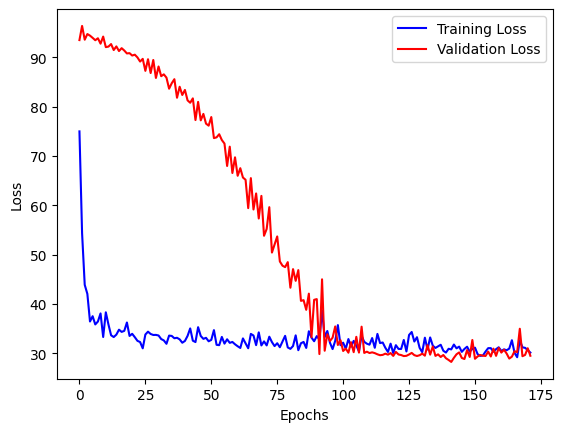

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_100_20.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_100_20.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_100_20, y_pred_100_20)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_20, y_pred_100_20)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_20, y_pred_100_20, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: -0.28700329938159874
Mean Absolute Error (MAE): 8.841335063510472
Root Mean Squared Error (RMSE): 10.66100224799687


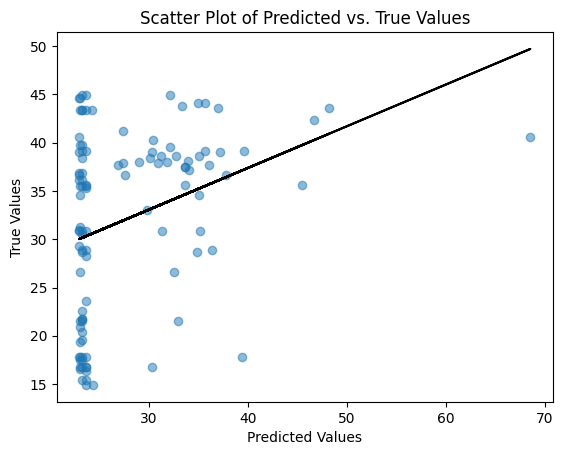

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_100_20, y_test_100_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_100_20.flatten(), y_test_100_20.flatten(), 1)
plt.plot(y_pred_100_20.flatten(), m*y_pred_100_20.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_100_20)
X_test_scaled = scaler.transform(X_test_100_20)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_100_20)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_100_20)
print("Model score:", score)


[LibSVM]Model score: 0.5779100649891896


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_100_20, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_20, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_20, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_100_20, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.5779100649891896
Mean Absolute Error (MAE): 5.054552356874293
Root Mean Squared Error (RMSE): 6.1053519291723
Mean Absolute Percentage Error (MAPE): 0.2061398054636165


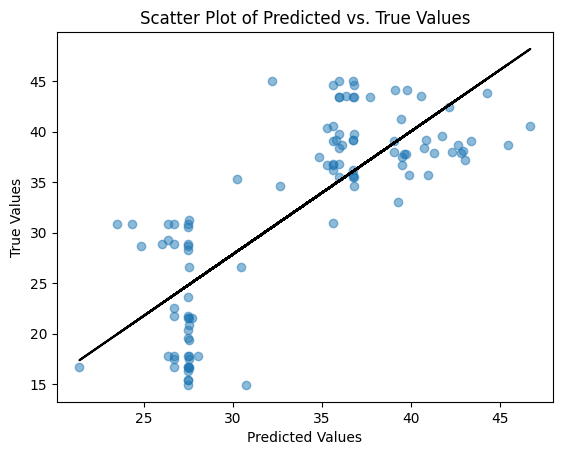

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_100_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_100_20, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_100_20)
X_test_scaled = scaler.transform(X_test_100_20)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_100_20)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_100_20, y_pred)
print("Model score:", score)


Model score: 0.7178320502006059


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_100_20, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_20, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_20, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_100_20, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7178320502006059
Mean Absolute Error (MAE): 4.084180173545366
Root Mean Squared Error (RMSE): 4.991855969484597
Mean Absolute Percentage Error (MAPE): 0.15451266018325954


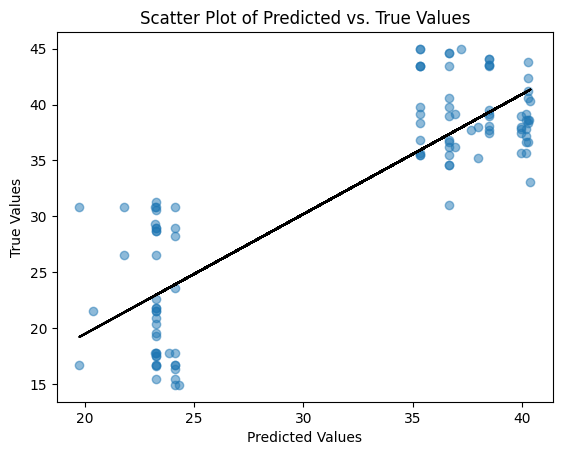

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_100_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_100_20, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 100m only 30x30



In [ ]:
df_100m_30 = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_100m_fast_trial_30.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_100m_30

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 7799,Descriptors 7800,Descriptors 7801,Descriptors 7802,Descriptors 7803,Descriptors 7804,Descriptors 7805,Descriptors 7806,Descriptors 7807,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1076,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1077,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1078,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_100m_30[df_100m_30['Feature Extraction 0'].isna()]
nan_rows_d = df_100m_30[df_100m_30['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_100m_30 = df_100m_30.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_100m_30 = df_100m_30.dropna(subset=['Descriptors 0'])

Found 540 rows with NaN values in the Feature Extraction column.
Found 540 rows with NaN values in the Descriptors column.


In [ ]:
X_100m_30 = df_100m_30.drop('Carbon Values', axis=1)
y_100m_30 = df_100m_30['Carbon Values']

In [ ]:
X_train_100_30, X_test_100_30, y_train_100_30, y_test_100_30 = train_test_split(X_100m_30, y_100m_30, test_size=0.2, random_state=42)

In [ ]:
X_train_100_30 = X_train_100_30.values.reshape((X_train_100_30.shape[0], X_train_100_30.shape[1], 1))
X_test_100_30 = X_test_100_30.values.reshape((X_test_100_30.shape[0], X_test_100_30.shape[1], 1))

y_train_100_30 = y_train_100_30.values
y_test_100_30 = y_test_100_30.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_100_30, X_test_100_30])

# Flatten the input sequences
X_train_flattened_100_30 = np.array([x.flatten() for x in X_train_100_30])
X_test_flattened_100_30 = np.array([x.flatten() for x in X_test_100_30])

# Normalize the flattened sequences
scaler = MaxAbsScaler()
# scaler = StandardScaler()
X_train_normalized_100_30 = scaler.fit_transform(X_train_flattened_100_30)
X_test_normalized_100_30 = scaler.transform(X_test_flattened_100_30)

# Reshape the paddedsequences to match the input shape expected by the model
X_train_padded_100_30 = np.expand_dims(X_train_normalized_100_30, axis=-1)
X_test_padded_100_30 = np.expand_dims(X_test_normalized_100_30, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None, 1))

x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1,activation='relu')(x)

model_100_30 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_100_30.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_100_30 = model_100_30.fit(X_train_padded_100_30, y_train_100_30,
                            epochs= 300,
                            batch_size=64,
                            verbose = 1,
                            callbacks=[reduce_lr,early_stop],
                               validation_data=(X_test_padded_100_30, y_test_100_30))

Epoch 1/300
7/7 [==============================] - 12s 674ms/step - loss: 65.5923 - val_loss: 91.2904 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 1s 205ms/step - loss: 43.6496 - val_loss: 95.7161 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 1s 212ms/step - loss: 38.8387 - val_loss: 93.0120 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 1s 206ms/step - loss: 36.8473 - val_loss: 94.7009 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 1s 213ms/step - loss: 34.9678 - val_loss: 93.3578 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 2s 224ms/step - loss: 34.7649 - val_loss: 93.8480 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 1s 215ms/step - loss: 34.9144 - val_loss: 93.1090 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 1s 217ms/step - loss: 31.9561 - val_loss: 93.3684 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 1s 216ms/step - loss: 33.2147 - val_

In [ ]:
y_pred_100_30 = model_100_30.predict(X_test_padded_100_30)
mape = mean_absolute_percentage_error(y_test_100_30, y_pred_100_30)
print(f'MAPE: {mape}')

4/4 [==============================] - 1s 133ms/step
MAPE: 0.1998041768177393


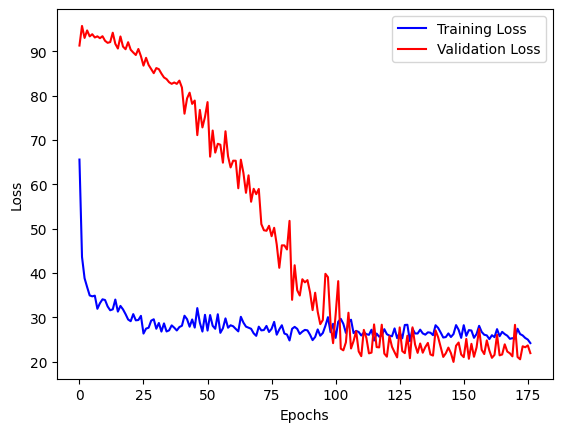

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_100_30.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_100_30.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_100_30, y_pred_100_30)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_30, y_pred_100_30)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_30, y_pred_100_30, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: 0.39131408130683365
Mean Absolute Error (MAE): 5.299811412669993
Root Mean Squared Error (RMSE): 7.331702467289943


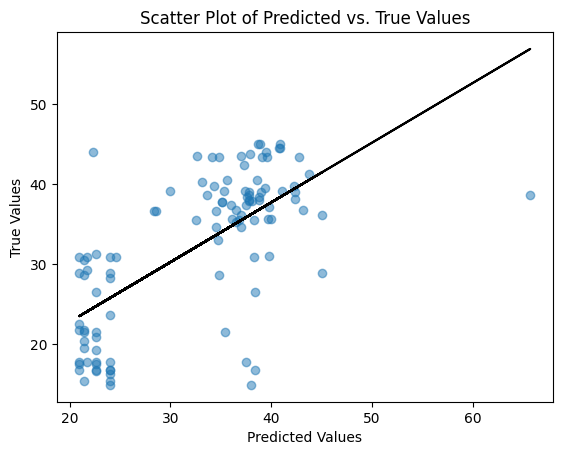

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_100_30, y_test_100_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_100_30.flatten(), y_test_100_30.flatten(), 1)
plt.plot(y_pred_100_30.flatten(), m*y_pred_100_30.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_100_30)
X_test_scaled = scaler.transform(X_test_100_30)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_100_30)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_100_30)
print("Model score:", score)


[LibSVM]Model score: 0.5664690009282063


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_100_30, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_30, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_30, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_100_30, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.5664690009282063
Mean Absolute Error (MAE): 4.963904326736672
Root Mean Squared Error (RMSE): 6.187543755480649
Mean Absolute Percentage Error (MAPE): 0.18444227156458162


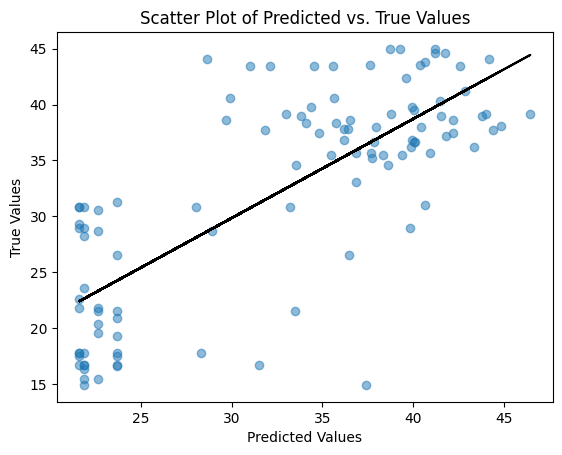

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_100_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_100_30, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_100_30)
X_test_scaled = scaler.transform(X_test_100_30)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_100_30)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_100_30, y_pred)
print("Model score:", score)


Model score: 0.7663076566735897


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_100_30, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_100_30, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_100_30, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_100_30, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7663076566735897
Mean Absolute Error (MAE): 3.785245926401592
Root Mean Squared Error (RMSE): 4.542871437344665
Mean Absolute Percentage Error (MAPE): 0.14679554254777363


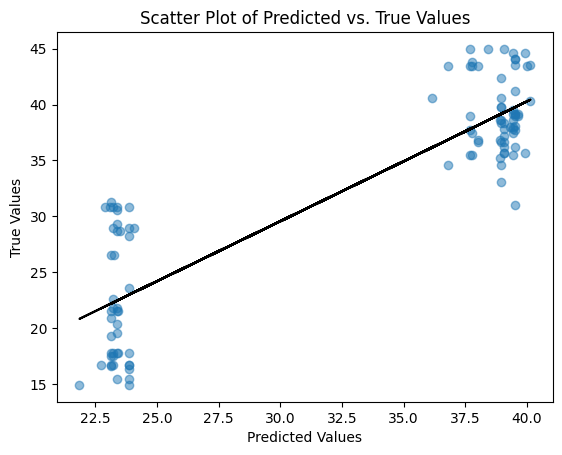

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_100_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_100_30, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 50m only 10x10



In [ ]:
df_50m = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_50m_fast_trial_10.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_50m

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Descriptors 0,...,Descriptors 503,Descriptors 504,Descriptors 505,Descriptors 506,Descriptors 507,Descriptors 508,Descriptors 509,Descriptors 510,Descriptors 511,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,2,0.0,0.0,3.0,3.0,6.0,4.0,5.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1068,2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1069,2,0.0,0.0,0.0,0.0,6.0,4.0,5.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1070,2,0.0,0.0,4.0,3.0,6.0,4.0,5.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_50m[df_50m['Feature Extraction 0'].isna()]
nan_rows_d = df_50m[df_50m['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_50m = df_50m.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_50m = df_50m.dropna(subset=['Descriptors 0'])

Found 536 rows with NaN values in the Feature Extraction column.
Found 536 rows with NaN values in the Descriptors column.


In [ ]:
X_50_10 = df_50m.drop('Carbon Values', axis=1)
y_50_10 = df_50m['Carbon Values']

In [ ]:
X_train_50_10, X_test_50_10, y_train_50_10, y_test_50_10 = train_test_split(X_50_10, y_50_10, test_size=0.2, random_state=42)

In [ ]:
X_train_50_10 = X_train_50_10.values.reshape((X_train_50_10.shape[0], X_train_50_10.shape[1], 1))
X_test_50_10 = X_test_50_10.values.reshape((X_test_50_10.shape[0], X_test_50_10.shape[1], 1))

y_train_50_10 = y_train_50_10.values
y_test_50_10 = y_test_50_10.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_50_10, X_test_50_10])

# Flatten the input sequences
X_train_flattened_50_10 = np.array([x.flatten() for x in X_train_50_10])
X_test_flattened_50_10 = np.array([x.flatten() for x in X_test_50_10])

# Normalize the flattened sequences
scaler = MaxAbsScaler()

X_train_normalized_50_10 = scaler.fit_transform(X_train_flattened_50_10)
X_test_normalized_50_10 = scaler.transform(X_test_flattened_50_10)


# Reshape the paddedsequences to match the input shape expected by the model
X_train_padded_50_10 = np.expand_dims(X_train_normalized_50_10, axis=-1)
X_test_padded_50_10 = np.expand_dims(X_test_normalized_50_10, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None, 1))


x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1,activation='relu')(x)

model_50_10 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_50_10.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_50_10 = model_50_10.fit(X_train_padded_50_10, y_train_50_10,
                             epochs= 300,
                             batch_size=64,
                             verbose = 1,
                             callbacks=[reduce_lr, early_stop],
                             validation_data=(X_test_padded_50_10, y_test_50_10))

Epoch 1/300
7/7 [==============================] - 4s 83ms/step - loss: 57.2805 - val_loss: 92.2050 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 0s 18ms/step - loss: 40.6108 - val_loss: 95.7622 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 0s 18ms/step - loss: 37.6830 - val_loss: 93.8049 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 0s 18ms/step - loss: 32.6098 - val_loss: 93.9712 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 0s 16ms/step - loss: 33.6436 - val_loss: 94.6047 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 0s 19ms/step - loss: 30.9711 - val_loss: 93.3362 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 0s 18ms/step - loss: 29.8137 - val_loss: 94.0100 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 0s 18ms/step - loss: 29.9558 - val_loss: 93.3724 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 0s 19ms/step - loss: 29.6380 - val_loss: 93.6

In [ ]:
y_pred_50_10 = model_50_10.predict(X_test_padded_50_10)
mape = mean_absolute_percentage_error(y_test_50_10, y_pred_50_10)
print(f'MAPE: {mape}')

4/4 [==============================] - 1s 93ms/step
MAPE: 0.15311975269616027


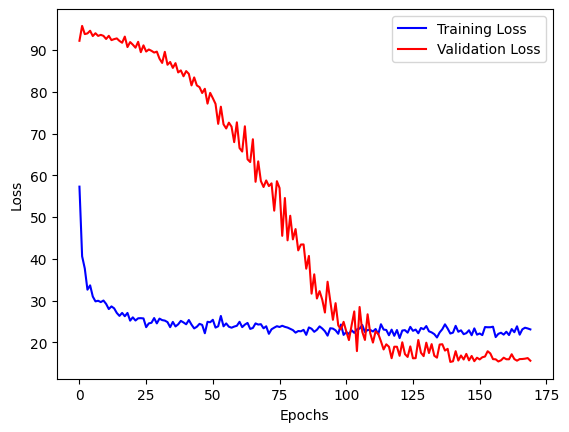

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_50_10.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_50_10.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_50_10, y_pred_50_10)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_10, y_pred_50_10)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_10, y_pred_50_10, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: 0.6847501026962624
Mean Absolute Error (MAE): 4.257942026632803
Root Mean Squared Error (RMSE): 5.232263035126418


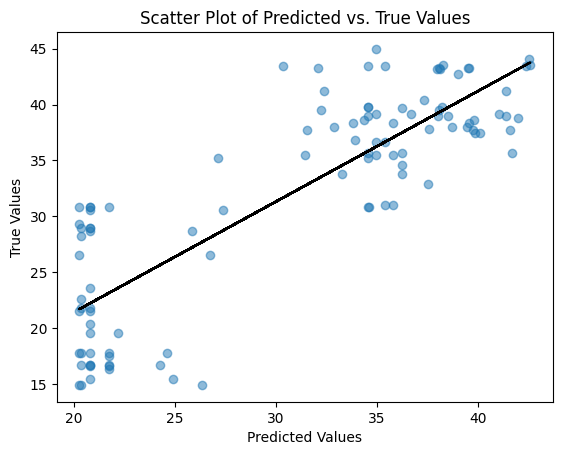

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_50_10, y_test_50_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_50_10.flatten(), y_test_50_10.flatten(), 1)
plt.plot(y_pred_50_10.flatten(), m*y_pred_50_10.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_50_10)
X_test_scaled = scaler.transform(X_test_50_10)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_50_10)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_50_10)
print("Model score:", score)


[LibSVM]Model score: 0.6060454673420503


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_50_10, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_10, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_10, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_50_10, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.6060454673420503
Mean Absolute Error (MAE): 4.60889385689509
Root Mean Squared Error (RMSE): 5.849047422908338
Mean Absolute Percentage Error (MAPE): 0.19885341374097582


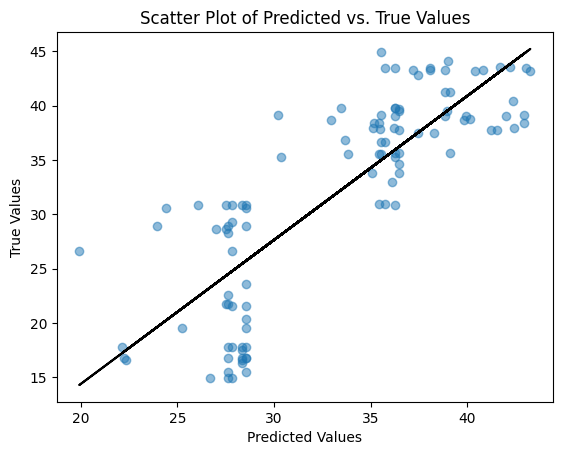

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_50_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_50_10, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_50_10)
X_test_scaled = scaler.transform(X_test_50_10)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_50_10)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_50_10, y_pred)
print("Model score:", score)


Model score: 0.7486729193661303


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_50_10, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_10, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_10, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_50_10, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7486729193661303
Mean Absolute Error (MAE): 3.953706943799502
Root Mean Squared Error (RMSE): 4.671773028443519
Mean Absolute Percentage Error (MAPE): 0.15521614280427748


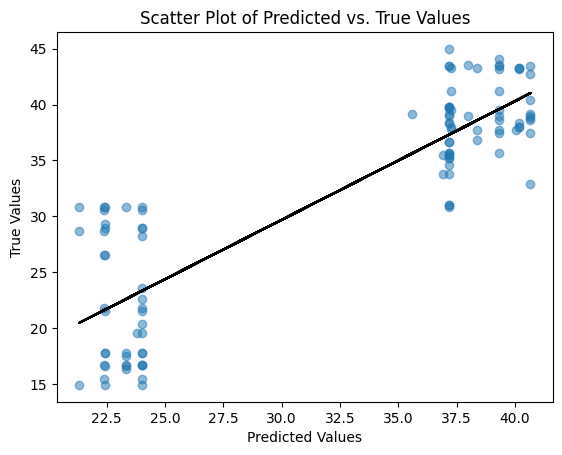

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_50_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_50_10, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 50m only 20x20



In [ ]:
df_50m_20 = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_50m_fast_trial_20.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_50m_20

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 3447,Descriptors 3448,Descriptors 3449,Descriptors 3450,Descriptors 3451,Descriptors 3452,Descriptors 3453,Descriptors 3454,Descriptors 3455,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2,0.0,0.0,14.0,3.0,16.0,3.0,3.0,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1076,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1077,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1078,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_50m_20[df_50m_20['Feature Extraction 0'].isna()]
nan_rows_d = df_50m_20[df_50m_20['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_50m_20 = df_50m_20.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_50m_20 = df_50m_20.dropna(subset=['Descriptors 0'])

Found 540 rows with NaN values in the Feature Extraction column.
Found 540 rows with NaN values in the Descriptors column.


In [ ]:
X_50m_20 = df_50m_20.drop('Carbon Values', axis=1)
y_50m_20 = df_50m_20['Carbon Values']

In [ ]:
X_train_50_20, X_test_50_20, y_train_50_20, y_test_50_20 = train_test_split(X_50m_20, y_50m_20, test_size=0.2, random_state=42)

In [ ]:
X_train_50_20 = X_train_50_20.values.reshape((X_train_50_20.shape[0], X_train_50_20.shape[1], 1))
X_test_50_20 = X_test_50_20.values.reshape((X_test_50_20.shape[0], X_test_50_20.shape[1], 1))

y_train_50_20 = y_train_50_20.values
y_test_50_20 = y_test_50_20.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_50_20, X_test_50_20])

# Flatten the input sequences
X_train_flattened_50_20 = np.array([x.flatten() for x in X_train_50_20])
X_test_flattened_50_20 = np.array([x.flatten() for x in X_test_50_20])

# Normalize the flattened sequences
scaler = MaxAbsScaler()
# scaler = StandardScaler()
X_train_normalized_50_20 = scaler.fit_transform(X_train_flattened_50_20)
X_test_normalized_50_20 = scaler.transform(X_test_flattened_50_20)

# Reshape the paddedsequences to match the input shape expected by the model
X_train_padded_50_20 = np.expand_dims(X_train_normalized_50_20, axis=-1)
X_test_padded_50_20 = np.expand_dims(X_test_normalized_50_20, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None,1))


x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1,activation='relu')(x)

model_50_20 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_50_20.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_50_20 = model_50_20.fit(X_train_padded_50_20,
                          y_train_50_20,
                          epochs= 300,
                          batch_size=64,
                          verbose = 1,
                          callbacks=[reduce_lr, early_stop],
                          validation_data=(X_test_padded_50_20,
                          y_test_50_20))

Epoch 1/300
7/7 [==============================] - 3s 95ms/step - loss: 65.5170 - val_loss: 98.7917 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 0s 50ms/step - loss: 40.8092 - val_loss: 98.0045 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 0s 51ms/step - loss: 38.8815 - val_loss: 97.7518 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 0s 49ms/step - loss: 36.4413 - val_loss: 99.0664 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 0s 49ms/step - loss: 35.9040 - val_loss: 98.7522 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 0s 56ms/step - loss: 31.6263 - val_loss: 99.7833 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 0s 49ms/step - loss: 35.6752 - val_loss: 99.1970 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 0s 50ms/step - loss: 32.8485 - val_loss: 100.1669 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 0s 50ms/step - loss: 33.3191 - val_loss: 100

In [ ]:
y_pred_50_20 = model_50_20.predict(X_test_padded_50_20)
mape = mean_absolute_percentage_error(y_test_50_20, y_pred_50_20)
print(f'MAPE: {mape}')

4/4 [==============================] - 0s 8ms/step
MAPE: 0.9775180890019217


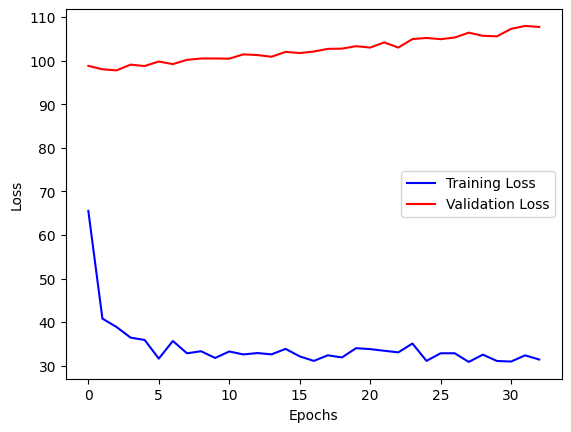

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_50_20.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_50_20.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_50_20, y_pred_50_20)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_20, y_pred_50_20)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_20, y_pred_50_20, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: -13.356434594995097
Mean Absolute Error (MAE): 31.756785014867777
Root Mean Squared Error (RMSE): 35.60668177235975


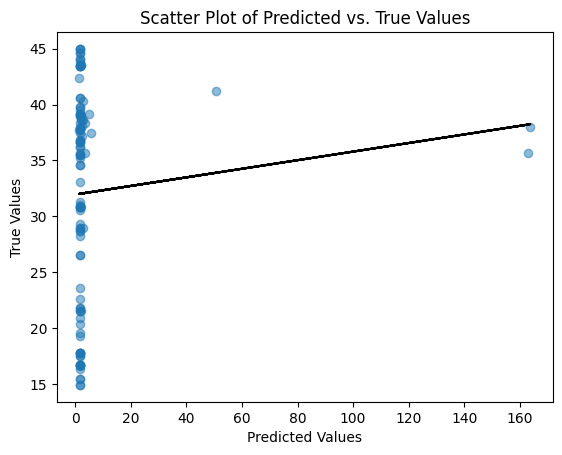

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_50_20, y_test_50_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_50_20.flatten(), y_test_50_20.flatten(), 1)
plt.plot(y_pred_50_20.flatten(), m*y_pred_50_20.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_50_20)
X_test_scaled = scaler.transform(X_test_50_20)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_50_20)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_50_20)
print("Model score:", score)


[LibSVM]Model score: 0.502093403608868


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_50_20, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_20, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_20, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_50_20, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.502093403608868
Mean Absolute Error (MAE): 5.437781176588621
Root Mean Squared Error (RMSE): 6.631047589723031
Mean Absolute Percentage Error (MAPE): 0.21474913478786362


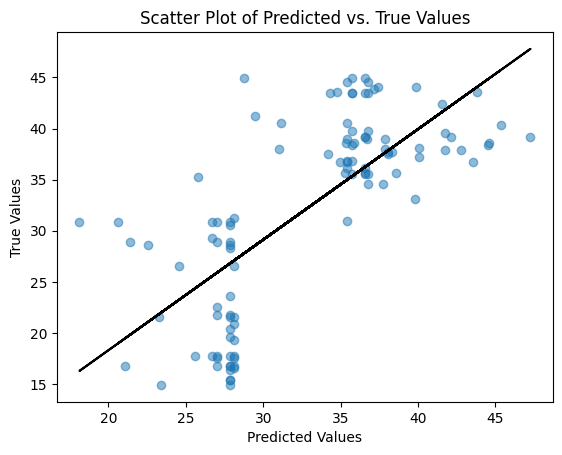

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_50_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_50_20, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_50_20)
X_test_scaled = scaler.transform(X_test_50_20)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_50_20)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_50_20, y_pred)
print("Model score:", score)


Model score: 0.7377265591149021


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_50_20, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_20, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_20, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_50_20, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7377265591149021
Mean Absolute Error (MAE): 3.9883706384328605
Root Mean Squared Error (RMSE): 4.81266200167086
Mean Absolute Percentage Error (MAPE): 0.15065397298216046


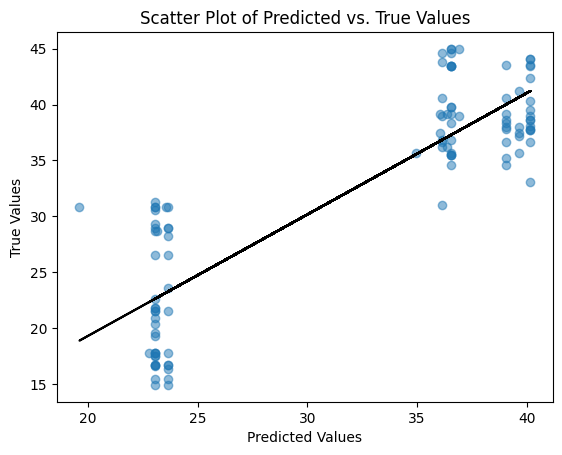

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_50_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_50_20, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 50m only 30x30



In [ ]:
df_50m_30 = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_50m_fast_trial_30.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_50m_30

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 8695,Descriptors 8696,Descriptors 8697,Descriptors 8698,Descriptors 8699,Descriptors 8700,Descriptors 8701,Descriptors 8702,Descriptors 8703,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1076,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1077,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1078,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_50m_30[df_50m_30['Feature Extraction 0'].isna()]
nan_rows_d = df_50m_30[df_50m_30['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_50m_30 = df_50m_30.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_50m_30 = df_50m_30.dropna(subset=['Descriptors 0'])

Found 540 rows with NaN values in the Feature Extraction column.
Found 540 rows with NaN values in the Descriptors column.


In [ ]:
X_50m_30 = df_50m_30.drop('Carbon Values', axis=1)
y_50m_30 = df_50m_30['Carbon Values']

In [ ]:
X_train_50_30, X_test_50_30, y_train_50_30, y_test_50_30 = train_test_split(X_50m_30, y_50m_30, test_size=0.2, random_state=42)

In [ ]:
X_train_50_30 = X_train_50_30.values.reshape((X_train_50_30.shape[0], X_train_50_30.shape[1], 1))
X_test_50_30 = X_test_50_30.values.reshape((X_test_50_30.shape[0], X_test_50_30.shape[1], 1))

y_train_50_30 = y_train_50_30.values
y_test_50_30 = y_test_50_30.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_50_30, X_test_50_30])

# Flatten the input sequences
X_train_flattened_50_30 = np.array([x.flatten() for x in X_train_50_30])
X_test_flattened_50_30 = np.array([x.flatten() for x in X_test_50_30])

# Normalize the flattened sequences
scaler = MaxAbsScaler()
# scaler = StandardScaler()
X_train_normalized_50_30 = scaler.fit_transform(X_train_flattened_50_30)
X_test_normalized_50_30 = scaler.transform(X_test_flattened_50_30)


# Reshape the paddedsequences to match the input shape expected by the model
X_train_padded_50_30 = np.expand_dims(X_train_normalized_50_30, axis=-1)
X_test_padded_50_30 = np.expand_dims(X_test_normalized_50_30, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D


x = Conv1D(filters=32, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1,activation='relu')(x)

model_50_30 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_50_30.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_50_30 = model_50_30.fit(X_train_padded_50_30, y_train_50_30,
                             epochs= 300,
                             batch_size=64,
                             verbose = 1,
                             callbacks=[reduce_lr, early_stop],
                             validation_data=(X_test_padded_50_30, y_test_50_30))

Epoch 1/300
7/7 [==============================] - 3s 159ms/step - loss: 59.7408 - val_loss: 89.6940 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 1s 123ms/step - loss: 40.3534 - val_loss: 93.3294 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 1s 122ms/step - loss: 38.7695 - val_loss: 91.8628 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 1s 122ms/step - loss: 35.5112 - val_loss: 90.3319 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 1s 123ms/step - loss: 34.8485 - val_loss: 91.3964 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 1s 123ms/step - loss: 32.2593 - val_loss: 90.7909 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 1s 123ms/step - loss: 32.9397 - val_loss: 89.8004 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 1s 124ms/step - loss: 32.9802 - val_loss: 90.4405 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 1s 124ms/step - loss: 33.6162 - val_l

In [ ]:
y_pred_50_30 = model_50_30.predict(X_test_padded_50_30)
mape = mean_absolute_percentage_error(y_test_50_30, y_pred_50_30)
print(f'MAPE: {mape}')

4/4 [==============================] - 1s 57ms/step
MAPE: 0.3021596280900157


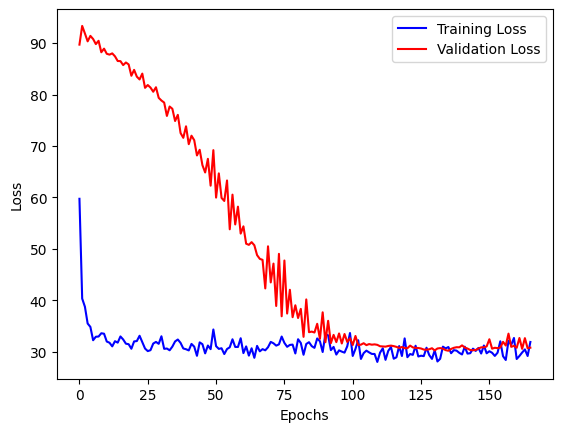

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_50_30.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_50_30.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_50_30, y_pred_50_30)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_30, y_pred_50_30)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_30, y_pred_50_30, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: -0.3192814124227066
Mean Absolute Error (MAE): 8.3011054081387
Root Mean Squared Error (RMSE): 10.793863623385187


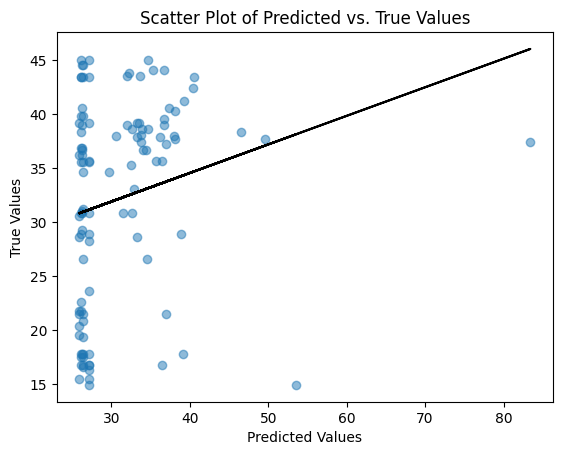

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_50_30, y_test_50_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_50_30.flatten(), y_test_50_30.flatten(), 1)
plt.plot(y_pred_50_30.flatten(), m*y_pred_50_30.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_50_30)
X_test_scaled = scaler.transform(X_test_50_30)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_50_30)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_50_30)
print("Model score:", score)


[LibSVM]Model score: 0.614999584714194


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_50_30, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_30, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_30, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_50_30, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.614999584714194
Mean Absolute Error (MAE): 4.7245581083167
Root Mean Squared Error (RMSE): 5.830943104052439
Mean Absolute Percentage Error (MAPE): 0.19199912628273433


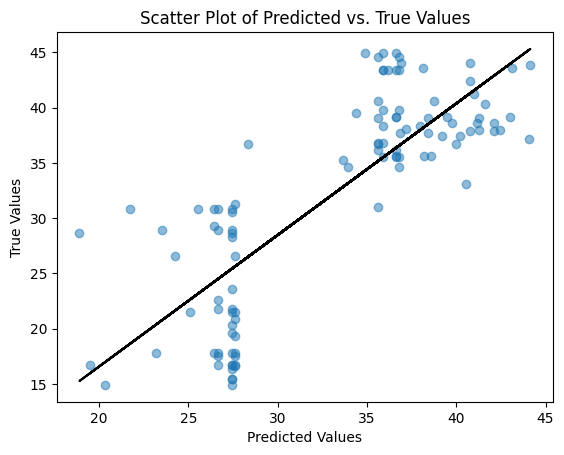

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_50_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_50_30, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_50_30)
X_test_scaled = scaler.transform(X_test_50_30)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_50_30)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_50_30, y_pred)
print("Model score:", score)


Model score: 0.743035320761714


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_50_30, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_50_30, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_50_30, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_50_30, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.743035320761714
Mean Absolute Error (MAE): 3.9309032522339997
Root Mean Squared Error (RMSE): 4.763705674972587
Mean Absolute Percentage Error (MAPE): 0.14866972225616923


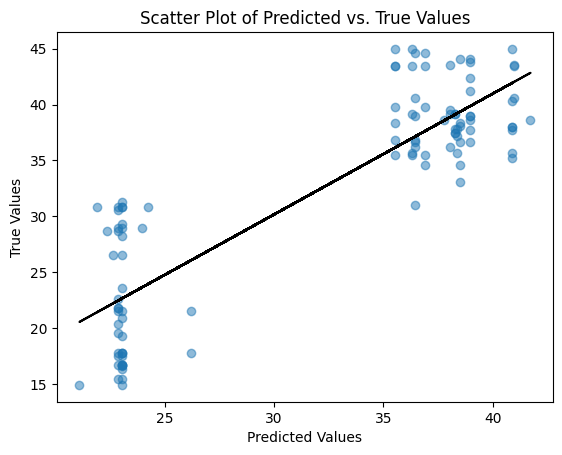

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_50_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_50_30, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 25m only 10x10



In [ ]:
df_25m = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_25m_fast_trial_10.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_25m

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Descriptors 0,...,Descriptors 503,Descriptors 504,Descriptors 505,Descriptors 506,Descriptors 507,Descriptors 508,Descriptors 509,Descriptors 510,Descriptors 511,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1066,2,0.0,0.0,4.0,3.0,6.0,4.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1067,2,0.0,0.0,0.0,0.0,6.0,4.0,3.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1068,2,0.0,0.0,3.0,4.0,6.0,4.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_25m[df_25m['Feature Extraction 0'].isna()]
nan_rows_d = df_25m[df_25m['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_25m = df_25m.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_25m = df_25m.dropna(subset=['Descriptors 0'])

Found 535 rows with NaN values in the Feature Extraction column.
Found 535 rows with NaN values in the Descriptors column.


In [ ]:
X_25_10 = df_25m.drop('Carbon Values', axis=1)
y_25_10 = df_25m['Carbon Values']

In [ ]:
X_train_25_10, X_test_25_10, y_train_25_10, y_test_25_10 = train_test_split(X_25_10, y_25_10, test_size=0.2, random_state=42)

In [ ]:
X_train_25_10 = X_train_25_10.values.reshape((X_train_25_10.shape[0], X_train_25_10.shape[1], 1))
X_test_25_10 = X_test_25_10.values.reshape((X_test_25_10.shape[0], X_test_25_10.shape[1], 1))

y_train_25_10 = y_train_25_10.values
y_test_25_10 = y_test_25_10.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_25_10, X_test_25_10])

# Flatten the input sequences
X_train_flattened_25_10 = np.array([x.flatten() for x in X_train_25_10])
X_test_flattened_25_10 = np.array([x.flatten() for x in X_test_25_10])

# Normalize the flattened sequences
scaler = MaxAbsScaler()
# scaler = StandardScaler()
X_train_normalized_25_10 = scaler.fit_transform(X_train_flattened_25_10)
X_test_normalized_25_10 = scaler.transform(X_test_flattened_25_10)

# Reshape the paddedsequences to match the input shape expected by the model
X_train_padded_25_10 = np.expand_dims(X_train_normalized_25_10, axis=-1)
X_test_padded_25_10 = np.expand_dims(X_test_normalized_25_10, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None, 1))

x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)


x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1,activation='relu')(x)

model_25_10 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_25_10.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_25_10 = model_25_10.fit(X_train_padded_25_10, y_train_25_10,
                             epochs= 300,
                             batch_size=64,
                             verbose = 1,
                             callbacks=[reduce_lr, early_stop],
                             validation_data=(X_test_padded_25_10, y_test_25_10))

Epoch 1/300
7/7 [==============================] - 2s 65ms/step - loss: 57.2600 - val_loss: 93.0906 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 0s 19ms/step - loss: 36.2277 - val_loss: 95.8544 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 0s 18ms/step - loss: 33.2387 - val_loss: 93.4867 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 0s 15ms/step - loss: 31.3914 - val_loss: 95.1794 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 0s 19ms/step - loss: 30.1295 - val_loss: 93.4327 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 0s 16ms/step - loss: 30.8702 - val_loss: 94.3300 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 0s 17ms/step - loss: 28.6699 - val_loss: 93.8561 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 0s 16ms/step - loss: 27.0205 - val_loss: 93.3802 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 0s 15ms/step - loss: 27.7646 - val_loss: 93.9

In [ ]:
y_pred_25_10 = model_25_10.predict(X_test_padded_25_10)
mape = mean_absolute_percentage_error(y_test_25_10, y_pred_25_10)
print(f'MAPE: {mape}')

4/4 [==============================] - 0s 32ms/step
MAPE: 0.16837792094536097


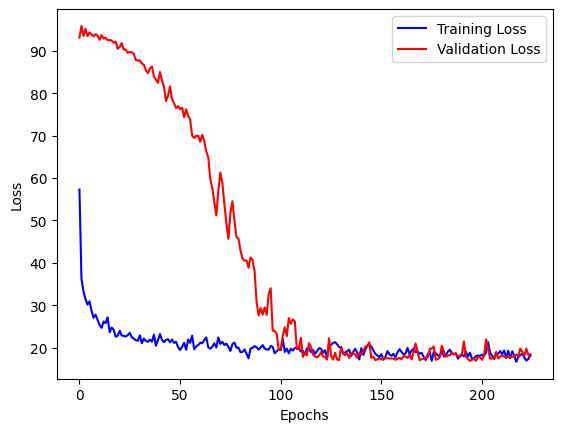

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_25_10.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_25_10.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_25_10, y_pred_25_10)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_10, y_pred_25_10)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_10, y_pred_25_10, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: 0.5977803793377078
Mean Absolute Error (MAE): 4.560488301214771
Root Mean Squared Error (RMSE): 5.8716874846664355


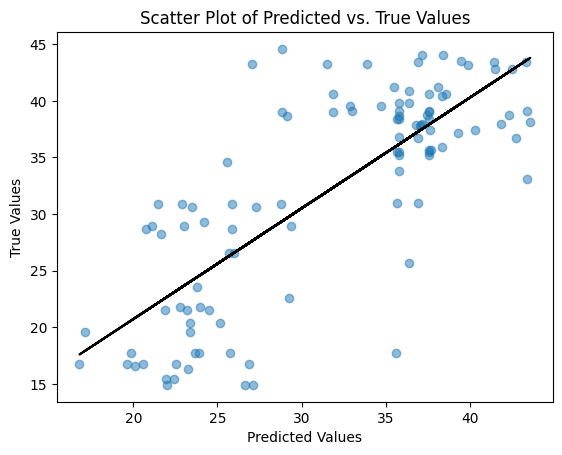

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_25_10, y_test_25_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_25_10.flatten(), y_test_25_10.flatten(), 1)
plt.plot(y_pred_25_10.flatten(), m*y_pred_25_10.flatten() + b, color='black')

plt.show()



In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_25_10)
X_test_scaled = scaler.transform(X_test_25_10)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_25_10)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_25_10)
print("Model score:", score)


[LibSVM]Model score: 0.6407333707445872


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_25_10, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_10, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_10, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_25_10, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.6407333707445872
Mean Absolute Error (MAE): 4.347563392746679
Root Mean Squared Error (RMSE): 5.5493197086159824
Mean Absolute Percentage Error (MAPE): 0.18244534787535197


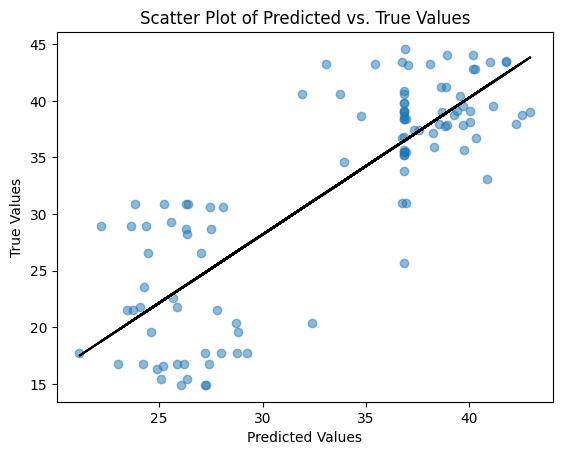

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_25_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_25_10, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_25_10)
X_test_scaled = scaler.transform(X_test_25_10)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_25_10)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_25_10, y_pred)
print("Model score:", score)


Model score: 0.7367202338706675


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_25_10, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_10, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_10, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_25_10, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7367202338706675
Mean Absolute Error (MAE): 3.7916664882445583
Root Mean Squared Error (RMSE): 4.750507939879524
Mean Absolute Percentage Error (MAPE): 0.1511977730263653


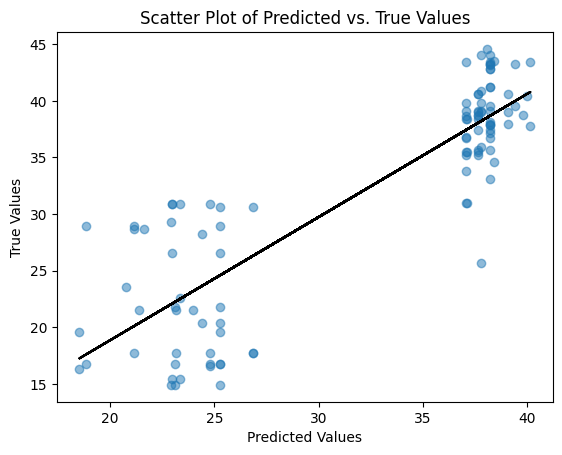

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_25_10, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_25_10, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 25m only 20x20



In [ ]:
df_25m_20 = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_25m_fast_trial_20.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_25m_20

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 3959,Descriptors 3960,Descriptors 3961,Descriptors 3962,Descriptors 3963,Descriptors 3964,Descriptors 3965,Descriptors 3966,Descriptors 3967,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1076,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1077,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1078,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_25m_20[df_25m_20['Feature Extraction 0'].isna()]
nan_rows_d = df_25m_20[df_25m_20['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_25m_20 = df_25m_20.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_25m_20 = df_25m_20.dropna(subset=['Descriptors 0'])

Found 540 rows with NaN values in the Feature Extraction column.
Found 540 rows with NaN values in the Descriptors column.


In [ ]:
X_25m_20 = df_25m_20.drop('Carbon Values', axis=1)
y_25m_20 = df_25m_20['Carbon Values']

In [ ]:
X_train_25_20, X_test_25_20, y_train_25_20, y_test_25_20 = train_test_split(X_25m_20, y_25m_20, test_size=0.2, random_state=42)

In [ ]:
X_train_25_20 = X_train_25_20.values.reshape((X_train_25_20.shape[0], X_train_25_20.shape[1], 1))
X_test_25_20 = X_test_25_20.values.reshape((X_test_25_20.shape[0], X_test_25_20.shape[1], 1))

y_train_25_20 = y_train_25_20.values
y_test_25_20 = y_test_25_20.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_25_20, X_test_25_20])

# Flatten the input sequences
X_train_flattened_25_20 = np.array([x.flatten() for x in X_train_25_20])
X_test_flattened_25_20 = np.array([x.flatten() for x in X_test_25_20])

# Normalize the flattened sequences
scaler = MaxAbsScaler()
# scaler = StandardScaler()
X_train_normalized_25_20 = scaler.fit_transform(X_train_flattened_25_20)
X_test_normalized_25_20 = scaler.transform(X_test_flattened_25_20)

# Reshape the paddedsequences to match the input shape expected by the model
X_train_padded_25_20 = np.expand_dims(X_train_normalized_25_20, axis=-1)
X_test_padded_25_20 = np.expand_dims(X_test_normalized_25_20, axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None, 1))

x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)


x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1,activation='relu')(x)

model_25_20 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_25_20.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_25_20 = model_25_20.fit(X_train_padded_25_20,
                             y_train_25_20,
                             epochs= 300,
                             batch_size=64,
                             verbose = 1,
                             callbacks=[reduce_lr, early_stop],
                             validation_data=(X_test_padded_25_20, y_test_25_20))

Epoch 1/300
7/7 [==============================] - 4s 269ms/step - loss: 57.6052 - val_loss: 89.7017 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 1s 76ms/step - loss: 34.8475 - val_loss: 94.8616 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 1s 75ms/step - loss: 39.1302 - val_loss: 93.1692 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 1s 75ms/step - loss: 31.6012 - val_loss: 92.3760 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 1s 75ms/step - loss: 32.3690 - val_loss: 92.7314 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 1s 75ms/step - loss: 31.0601 - val_loss: 92.5232 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 1s 79ms/step - loss: 31.4955 - val_loss: 91.4960 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 1s 75ms/step - loss: 32.7273 - val_loss: 92.8333 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 1s 76ms/step - loss: 29.7390 - val_loss: 91.

In [ ]:
y_pred_25_20 = model_25_20.predict(X_test_padded_25_20)
mape = mean_absolute_percentage_error(y_test_25_20, y_pred_25_20)
print(f'MAPE: {mape}')

4/4 [==============================] - 0s 46ms/step
MAPE: 0.29756976295914006


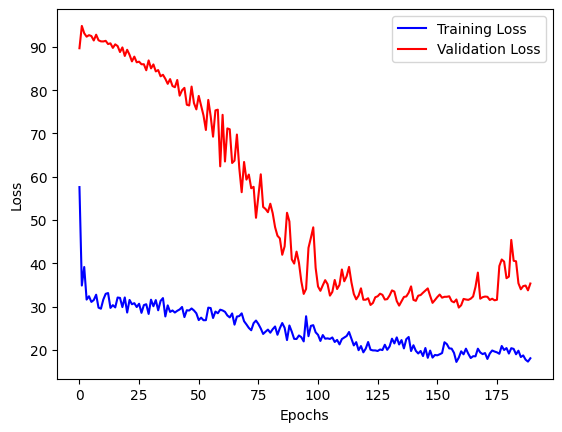

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_25_20.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_25_20.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_25_20, y_pred_25_20)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_20, y_pred_25_20)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_20, y_pred_25_20, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: -0.16466708916551775
Mean Absolute Error (MAE): 8.275389771638093
Root Mean Squared Error (RMSE): 10.1416613971787


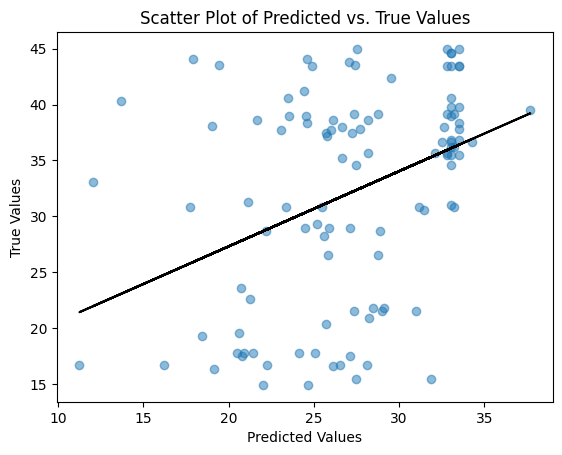

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_25_20, y_test_25_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_25_20.flatten(), y_test_25_20.flatten(), 1)
plt.plot(y_pred_25_20.flatten(), m*y_pred_25_20.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_25_20)
X_test_scaled = scaler.transform(X_test_25_20)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_25_20)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_25_20)
print("Model score:", score)


[LibSVM]Model score: 0.5014224250181822


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_25_20, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_20, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_20, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_25_20, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.5014224250181822
Mean Absolute Error (MAE): 5.22626554863971
Root Mean Squared Error (RMSE): 6.63551408307996
Mean Absolute Percentage Error (MAPE): 0.20861002579474858


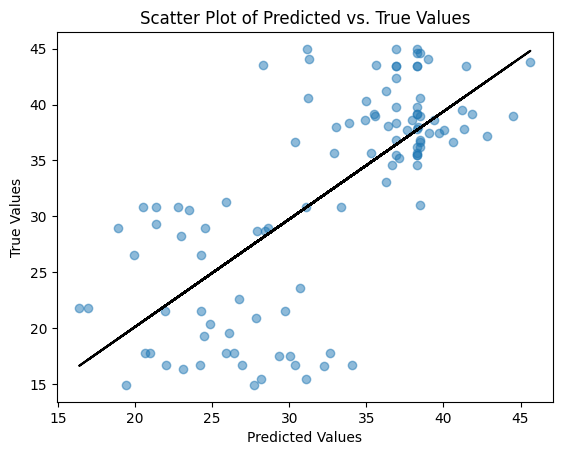

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_25_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_25_20, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_25_20)
X_test_scaled = scaler.transform(X_test_25_20)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_25_20)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_25_20, y_pred)
print("Model score:", score)


Model score: 0.7229654446959306


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_25_20, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_20, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_20, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_25_20, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7229654446959306
Mean Absolute Error (MAE): 3.9325496138899307
Root Mean Squared Error (RMSE): 4.946239899291075
Mean Absolute Percentage Error (MAPE): 0.14753972034014456


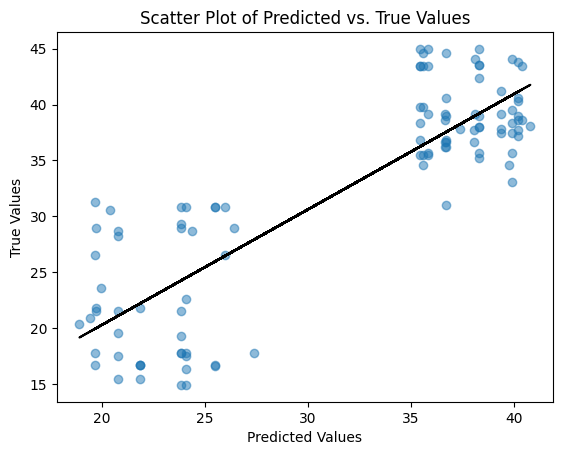

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_25_20, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_25_20, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# 25m only 30x30



In [ ]:
df_25m_30 = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_25m_fast_trial_30.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop(columns=['Unnamed: 0'],axis=1 )

df_25m_30

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 9847,Descriptors 9848,Descriptors 9849,Descriptors 9850,Descriptors 9851,Descriptors 9852,Descriptors 9853,Descriptors 9854,Descriptors 9855,Carbon Values
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1076,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1077,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22
1078,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.22


In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df_25m_30[df_25m_30['Feature Extraction 0'].isna()]
nan_rows_d = df_25m_30[df_25m_30['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df_25m_30 = df_25m_30.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df_25m_30 = df_25m_30.dropna(subset=['Descriptors 0'])

Found 540 rows with NaN values in the Feature Extraction column.
Found 540 rows with NaN values in the Descriptors column.


In [ ]:
X_25m_30 = df_25m_30.drop('Carbon Values', axis=1)
y_25m_30 = df_25m_30['Carbon Values']

In [ ]:
X_train_25_30, X_test_25_30, y_train_25_30, y_test_25_30 = train_test_split(X_25m_30, y_25m_30, test_size=0.2, random_state=42)

In [ ]:
X_train_25_30 = X_train_25_30.values.reshape((X_train_25_30.shape[0], X_train_25_30.shape[1], 1))
X_test_25_30 = X_test_25_30.values.reshape((X_test_25_30.shape[0], X_test_25_30.shape[1], 1))

y_train_25_30 = y_train_25_30.values
y_test_25_30 = y_test_25_30.values

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# Concatenate training and testing sequences to find the maximum sequence length
all_sequences = np.concatenate([X_train_25_30, X_test_25_30])

# Flatten the input sequences
X_train_flattened_25_30 = np.array([x.flatten() for x in X_train_25_30])
X_test_flattened_25_30 = np.array([x.flatten() for x in X_test_25_30])

# Normalize the flattened sequences
scaler = MaxAbsScaler()
# scaler = StandardScaler()
X_train_normalized_25_30 = scaler.fit_transform(X_train_flattened_25_30)
X_test_normalized_25_30 = scaler.transform(X_test_flattened_25_30)

X_train_padded_25_30 = np.expand_dims(X_train_normalized_25_30 , axis=-1)
X_test_padded_25_30 = np.expand_dims(X_test_normalized_25_30 , axis=-1)


In [ ]:
from keras.models import Model
from keras.layers import Flatten,Input,InputLayer, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization,GlobalMaxPooling1D

inputs = Input(shape=(None, 1))

x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)


x = Conv1D(filters=512, kernel_size=3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1,activation='relu')(x)

model_25_30 = Model(inputs=inputs, outputs=outputs)


In [ ]:
model_25_30.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

In [ ]:
hist_25_30 = model_25_30.fit(X_train_padded_25_30, y_train_25_30,
                             epochs= 300,
                             batch_size=64,
                             verbose = 1,
                             callbacks=[reduce_lr,early_stop],
                             validation_data=(X_test_padded_25_30, y_test_25_30))

Epoch 1/300
7/7 [==============================] - 9s 525ms/step - loss: 69.4788 - val_loss: 92.6783 - lr: 0.0010
Epoch 2/300
7/7 [==============================] - 1s 177ms/step - loss: 35.7644 - val_loss: 94.4848 - lr: 0.0010
Epoch 3/300
7/7 [==============================] - 1s 186ms/step - loss: 31.9629 - val_loss: 93.2096 - lr: 0.0010
Epoch 4/300
7/7 [==============================] - 1s 176ms/step - loss: 30.9370 - val_loss: 93.5240 - lr: 0.0010
Epoch 5/300
7/7 [==============================] - 1s 176ms/step - loss: 31.2980 - val_loss: 93.1373 - lr: 0.0010
Epoch 6/300
7/7 [==============================] - 1s 176ms/step - loss: 30.8588 - val_loss: 93.5007 - lr: 0.0010
Epoch 7/300
7/7 [==============================] - 1s 178ms/step - loss: 29.2344 - val_loss: 92.7249 - lr: 0.0010
Epoch 8/300
7/7 [==============================] - 1s 181ms/step - loss: 29.6916 - val_loss: 92.9618 - lr: 0.0010
Epoch 9/300
7/7 [==============================] - 1s 183ms/step - loss: 31.4632 - val_l

In [ ]:
y_pred_25_30 = model_25_30.predict(X_test_padded_25_30)
mape = mean_absolute_percentage_error(y_test_25_30, y_pred_25_30)
print(f'MAPE: {mape}')

4/4 [==============================] - 1s 90ms/step
MAPE: 0.27980139883761224


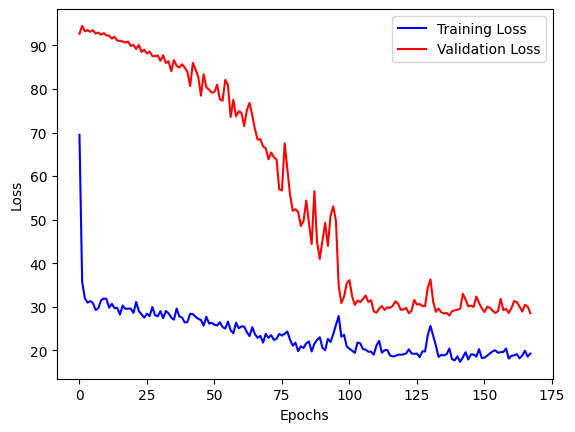

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist_25_30.history['loss'], label='Training Loss', color='blue')
plt.plot(hist_25_30.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test_25_30, y_pred_25_30)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_30, y_pred_25_30)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_30, y_pred_25_30, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on test set: -0.018826735051974408
Mean Absolute Error (MAE): 7.887193923173128
Root Mean Squared Error (RMSE): 9.485459436736146


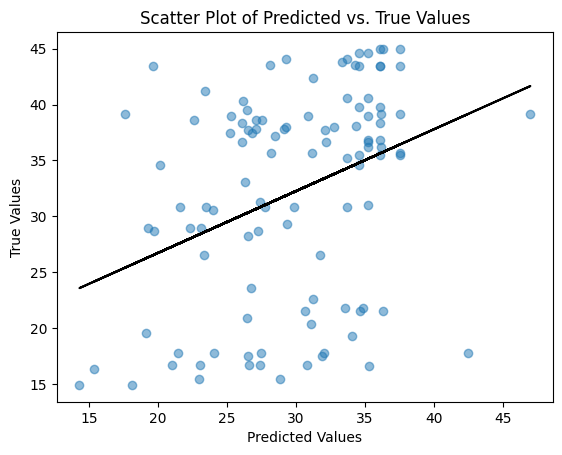

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred_25_30, y_test_25_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred_25_30.flatten(), y_test_25_30.flatten(), 1)
plt.plot(y_pred_25_30.flatten(), m*y_pred_25_30.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_25_30)
X_test_scaled = scaler.transform(X_test_25_30)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train_25_30)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test_25_30)
print("Model score:", score)


[LibSVM]Model score: 0.3839796696347092


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test_25_30, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_30, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_30, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_25_30, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.3839796696347092
Mean Absolute Error (MAE): 5.800349746096365
Root Mean Squared Error (RMSE): 7.375742179248304
Mean Absolute Percentage Error (MAPE): 0.2337922533418346


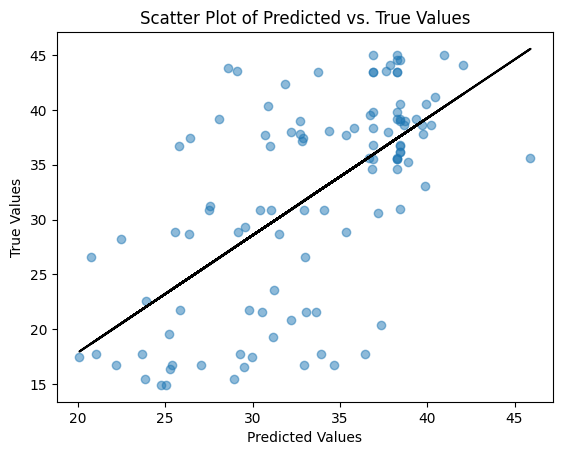

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_25_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_25_30, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_25_30)
X_test_scaled = scaler.transform(X_test_25_30)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train_25_30)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test_25_30, y_pred)
print("Model score:", score)


Model score: 0.7287414138947674


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already trained your model and made predictions on the test set
# If not, replace y_pred with the predictions made by your model
# Compute R-squared score on the test set

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test_25_30, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_25_30, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_25_30, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test_25_30, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7287414138947674
Mean Absolute Error (MAE): 3.994820638963495
Root Mean Squared Error (RMSE): 4.894405544903278
Mean Absolute Percentage Error (MAPE): 0.14145253630352686


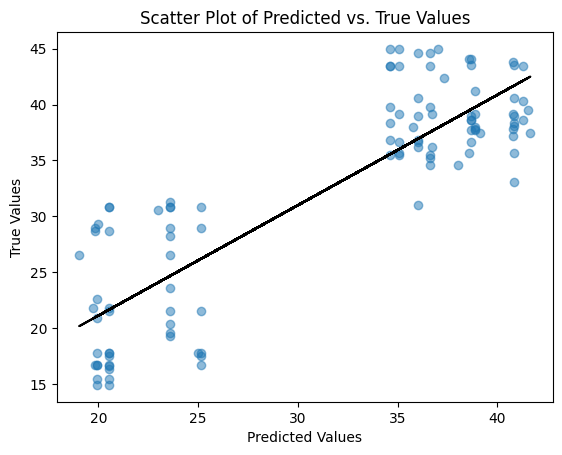

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test_25_30, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test_25_30, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


In [ ]:
model_25_30.save('/content/drive/MyDrive/Skripsi/model/model_25_30.h5')